## Predicting a Bank's Customer Churn

Utilize the dataset present at https://www.kaggle.com/santoshd3/bank-customers to try to predict the Churn of customers of a certain bank ('Exited' column of the dataset).



In [3]:
#Importing the Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [4]:
#reading the file
churn_data = pd.read_csv("Churn Modeling.csv")

In [5]:
churn_data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [6]:
#Dataset row count
churn_data.shape[0]

10000

In [7]:
#Data Statistcs 
churn_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
#Null value check
print(pd.isnull(churn_data).sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


### Exploratory Data Analysis

At this stage of the analysis, it is important to ask some questions to better understand the relationship between the variable we want to predict ('exited') and the other variables. Examples:

- Does the customer's gender in any way influence the customer's propensity to leave the bank?
- Does the customer's age in any way influence the customer's propensity to leave the bank?
- Does being an active customer in any way influence the customer's propensity to leave the bank?


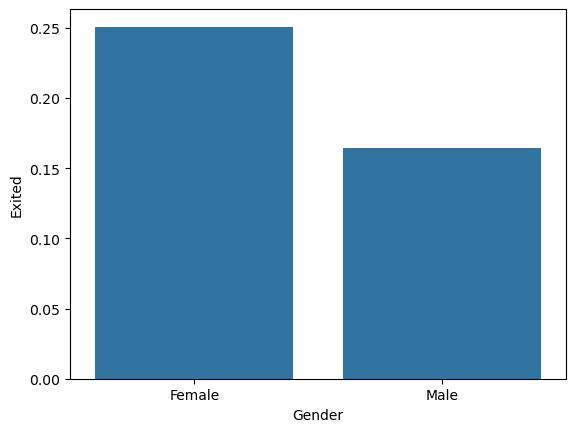

Percentage of women who left: 25.071538630860662
Percentage of men who left: 16.455928165658786


In [11]:
#plotting a bar graph showing the relationship between the customer's gender and their output from the bank
sns.barplot(x="Gender", y="Exited", data=churn_data, errorbar=None)
plt.show()

#print percentage of women vs. men who left
print("Percentage of women who left:", churn_data["Exited"][churn_data["Gender"] == 'Female'].value_counts(normalize = True)[1]*100)

print("Percentage of men who left:", churn_data["Exited"][churn_data["Gender"] == 'Male'].value_counts(normalize = True)[1]*100)

In [12]:
## Customer gender appears to be an important variable for predicting churn

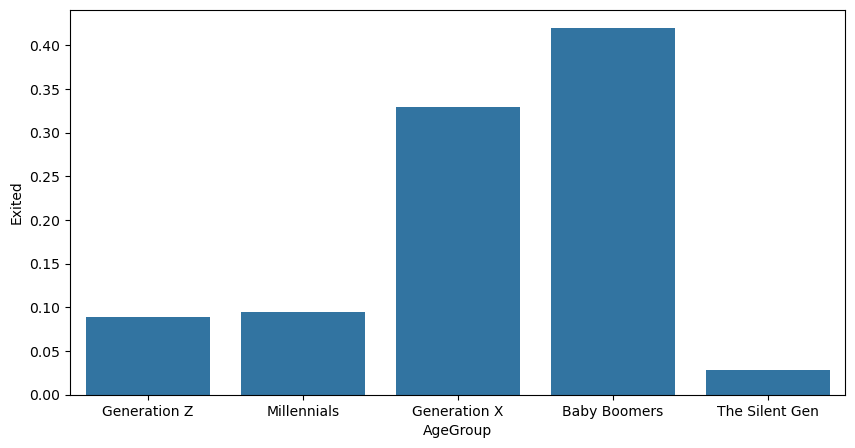

In [13]:
#dividing the age groups 
bins = [ 7, 22, 38, 54, 73, 100]
labels = ['Generation Z', 'Millennials', 'Generation X', 'Baby Boomers','The Silent Gen']
churn_data['AgeGroup'] = pd.cut(churn_data["Age"], bins, labels = labels)

#plotting a bar graph showing the relationship between the customer's age range and their departure from the bank
plt.figure(figsize=(10,5))
sns.barplot(x="AgeGroup", y="Exited", data=churn_data, errorbar=None)
plt.show()

In [14]:
churn_data['AgeGroup'].value_counts()

AgeGroup
Millennials       5338
Generation X      3554
Baby Boomers       810
Generation Z       226
The Silent Gen      72
Name: count, dtype: int64

In [15]:
### Gen X and Baby Boomers are more likely to leave the bank

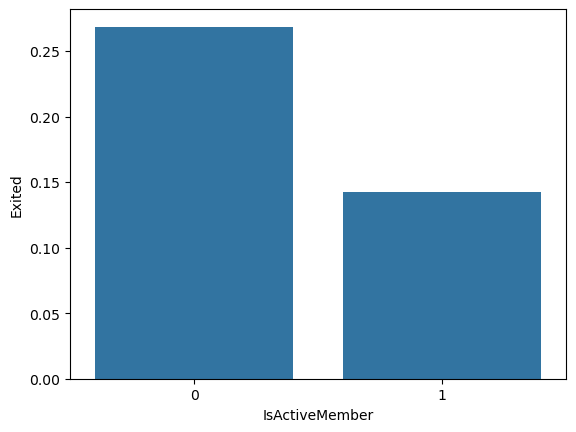

Percentage of active members who left: 14.269073966220153
Percentage of inactive members who left: 26.850897092183956


In [16]:
#plotting a bar graph showing the relationship between the customer's gender and their departure from the bank
sns.barplot(x="IsActiveMember", y="Exited", data=churn_data, errorbar=None)
plt.show()

#print percentage of women vs. men who left
print("Percentage of active members who left:", churn_data["Exited"][churn_data["IsActiveMember"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of inactive members who left:", churn_data["Exited"][churn_data["IsActiveMember"] == 0].value_counts(normalize = True)[1]*100)

In [17]:
## Inactive members are more likely to leave

### Feature Engineering

In [19]:
churn_data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeGroup
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Generation X
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Generation X
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Generation X
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Generation X
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Generation X
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,Generation X
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0,Generation X
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,Millennials
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,Generation X
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0,Millennials


In [20]:
churn_data= churn_data.drop(columns =['RowNumber','CustomerId','Surname'])

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
churn_data.Geography = le.fit_transform(churn_data.Geography)
churn_data.Gender = le.fit_transform(churn_data.Gender)
#churn_data.AgeGroup = le.fit_transform(churn_data.AgeGroup.astype(str))

In [22]:
age_mapping = {'Generation Z':1, 'Millennials':2, 'Generation X':3, 'Baby Boomers':4,'The Silent Gen':5}
churn_data['AgeGroup'] = churn_data['AgeGroup'].map(age_mapping)

In [23]:
churn_data['AgeGroup']=churn_data['AgeGroup'].astype(float)
churn_data['AgeGroup'].value_counts()

AgeGroup
2.0    5338
3.0    3554
4.0     810
1.0     226
5.0      72
Name: count, dtype: int64

In [24]:
churn_data.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeGroup
0,619,0,0,42,2,0.00,1,1,1,101348.88,1,3.0
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0,3.0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1,3.0
3,699,0,0,39,1,0.00,2,0,0,93826.63,0,3.0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0,3.0
5,645,2,1,44,8,113755.78,2,1,0,149756.71,1,3.0
6,822,0,1,50,7,0.00,2,1,1,10062.80,0,3.0
7,376,1,0,29,4,115046.74,4,1,0,119346.88,1,2.0
8,501,0,1,44,4,142051.07,2,0,1,74940.50,0,3.0
9,684,0,1,27,2,134603.88,1,1,1,71725.73,0,2.0


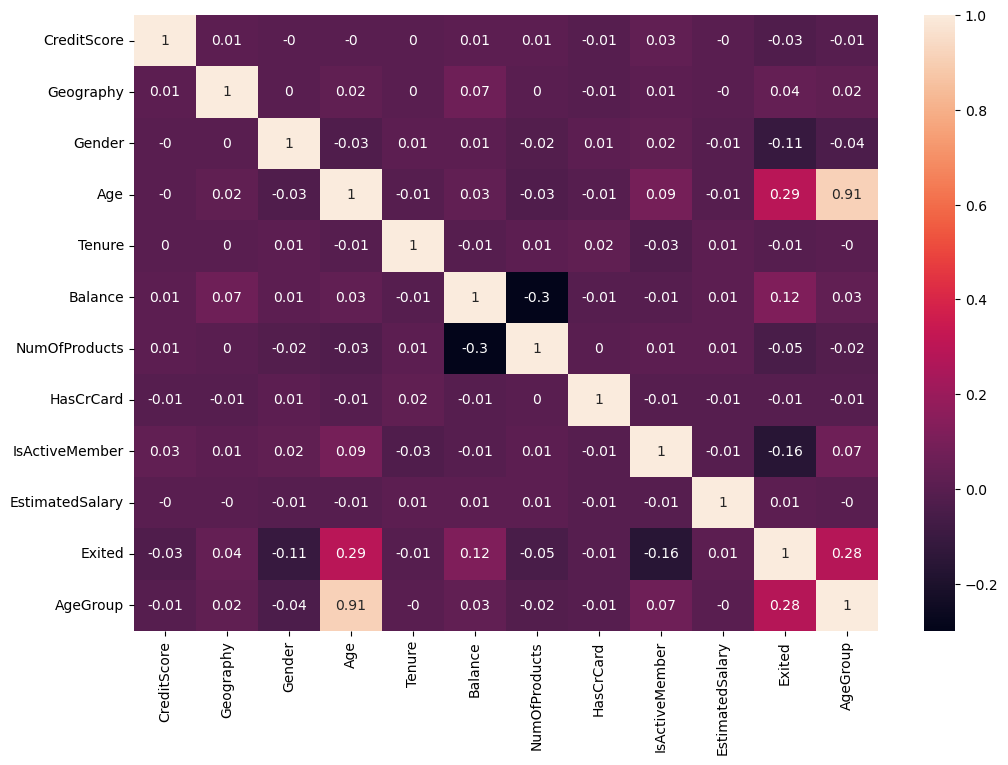

In [25]:
#We will use the heatmap function from the seaborn library to plot the correlation matrix.
import seaborn as sns
correlation_matrix = churn_data.corr().round(2)
plt.figure(figsize = (12,8))
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

In [26]:
churn_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeGroup
0,619,0,0,42,2,0.00,1,1,1,101348.88,1,3.0
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0,3.0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1,3.0
3,699,0,0,39,1,0.00,2,0,0,93826.63,0,3.0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0,3.0


In [27]:
churn_data= churn_data.drop(columns =['AgeGroup'])

In [28]:
churn_data.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
5,645,2,1,44,8,113755.78,2,1,0,149756.71,1
6,822,0,1,50,7,0.00,2,1,1,10062.80,0
7,376,1,0,29,4,115046.74,4,1,0,119346.88,1
8,501,0,1,44,4,142051.07,2,0,1,74940.50,0
9,684,0,1,27,2,134603.88,1,1,1,71725.73,0


### Testing our dataset with some Machine Learning models

In [30]:
from sklearn.model_selection import train_test_split

X = churn_data.drop(['Exited'], axis=1)
y = churn_data['Exited']
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [31]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64
9996,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,709,0,0,36,7,0.00,1,0,1,42085.58
9998,772,1,1,42,3,75075.31,2,1,0,92888.52


In [32]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gaussian)

79.2


In [33]:
# Logistic Regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Scale the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)

# Train the model with more iterations and fine-tuned solver
logreg = LogisticRegression(max_iter=500, solver='saga')
logreg.fit(x_train_scaled, y_train)

# Make predictions and calculate accuracyy_pred = logreg.predict(x_val_scaled)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)

79.2


In [34]:
# Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_svc)

80.53


In [35]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_decisiontree)

79.23


In [36]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier( random_state = 42)
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

86.83


In [37]:
# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_knn)

77.07


In [38]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gbk)

87.0


## Optimizing the parameters of the Gradient Boosting Classifier

In [40]:
### Optimizing the parameters of the Gradient Boosting Classifier 
rf = GradientBoostingClassifier(random_state = 0)
from pprint import pprint
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())


Parameters currently in use:

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 0,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [41]:
## Using RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define parameter distributions
param_dist = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0]
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=GradientBoostingClassifier(),
    param_distributions=param_dist,
    n_iter=50,  # Number of combinations to try
    scoring='accuracy',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(x_train, y_train)

# Best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation Accuracy:", random_search.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'subsample': 1.0, 'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 5, 'learning_rate': 0.05}
Best Cross-Validation Accuracy: 0.8582857142857143


In [42]:
## using Grid Search with cross-validation
# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage
    'max_depth': [3, 5, 7],  # Maximum depth of the individual trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples per leaf
    'subsample': [0.8, 1.0]  # Fraction of samples used for fitting the individual trees
}

# Set up Grid Search with cross-validation
grid_search = GridSearchCV(estimator=gbk, param_grid=param_grid, 
                           scoring='accuracy', cv=5, verbose=2, n_jobs=-1)

# Fit the model to find the best parameters
grid_search.fit(x_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Evaluate on the validation set
best_gbk = grid_search.best_estimator_
y_pred = best_gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Validation Accuracy:", acc_gbk)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50, 'subsample': 1.0}
Best Cross-Validation Accuracy: 0.8597142857142858
Validation Accuracy: 87.03


## Prediction using neural network

In [44]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_val = sc.transform(x_val)

In [45]:
x_train

array([[-0.34459497,  1.50730692, -1.09823226, ...,  0.64598061,
         0.97071435,  1.24821373],
       [-0.09518109,  0.30201238, -1.09823226, ..., -1.54803408,
         0.97071435,  1.52122527],
       [-0.94734518, -0.90328217,  0.91055421, ..., -1.54803408,
        -1.03016917,  1.2636148 ],
       ...,
       [ 0.86090545, -0.90328217, -1.09823226, ..., -1.54803408,
        -1.03016917, -0.14925893],
       [ 0.15423279, -0.90328217,  0.91055421, ...,  0.64598061,
        -1.03016917, -0.05754351],
       [ 0.46600014,  0.30201238,  0.91055421, ...,  0.64598061,
         0.97071435, -0.81942612]])

In [46]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

In [47]:
#The 1st line initializes the neural network
rede_neural = keras.models.Sequential()
#Add the first layer to our neural network
rede_neural.add(keras.layers.Dense(units=10, activation='relu'))
#Add the second layer to our neural network
rede_neural.add(keras.layers.Dense(units = 10, activation = 'relu'))
#Add the output layer to our neural network
rede_neural.add(keras.layers.Dense(units = 1, activation = 'sigmoid'))


In [48]:
#Loss Function — This measures how accurate the model is during training. We want to minimize the function to guide the model in the right direction.
#Optimizer — This is how the model updates itself based on the data it sees and its loss function.
#Metrics — This is used to monitor the training and testing steps.
#The example below uses accuracy, the number of customers that were correctly classified.

rede_neural.compile(optimizer  ='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [49]:
model_history = rede_neural.fit(x_train, y_train,validation_split=0.33,batch_size = 10, epochs = 50)
rede_neural.summary()

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6117 - loss: 0.6554 - val_accuracy: 0.7893 - val_loss: 0.4921
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7978 - loss: 0.4675 - val_accuracy: 0.8209 - val_loss: 0.4343
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8048 - loss: 0.4394 - val_accuracy: 0.8291 - val_loss: 0.4105
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8349 - loss: 0.3866 - val_accuracy: 0.8312 - val_loss: 0.3930
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8372 - loss: 0.3745 - val_accuracy: 0.8382 - val_loss: 0.3852
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8492 - loss: 0.3687 - val_accuracy: 0.8390 - val_loss: 0.3825
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8584 - loss: 0.3517 - val_accuracy: 0.8382 - val_loss: 0.3774
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8397 - loss: 0.3717 - val_accuracy: 0.

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 695 (2.72 KB)

 Trainable params: 231 (924.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 464 (1.82 KB)

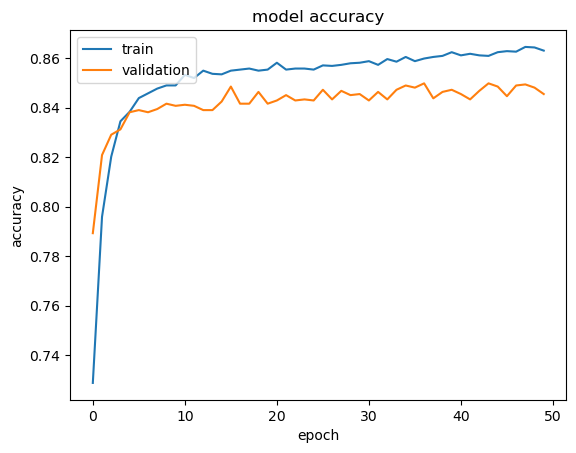

In [50]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

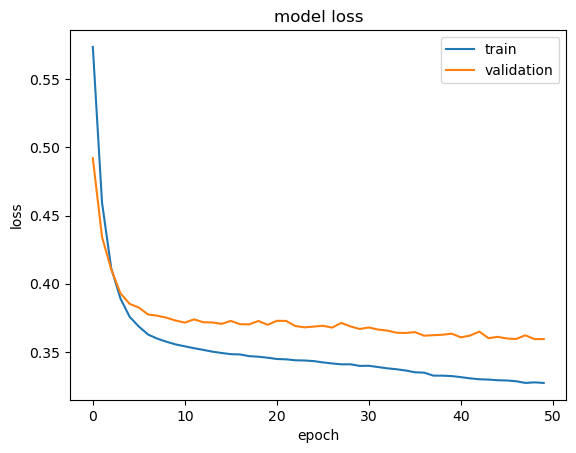

In [51]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [52]:
#from sklearn.metrics import accuracy_score
y_pred = rede_neural.predict(x_val)
y_pred =(y_pred > 0.5)
accuracy = accuracy_score(y_pred,y_val)
accuracy

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


0.8653333333333333

In [53]:
y_pred = rede_neural.predict(x_val)
y_pred

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[0.04576872],
       [0.02142334],
       [0.06840212],
       ...,
       [0.05141983],
       [0.01082467],
       [0.10972919]], dtype=float32)